#Vježbe 5 - 30.03.2023 - Grupiranje

### Primjena grupiranja: segmentacija 

In [ ]:
from matplotlib.image import imread
image=imread('/content/konj1.jpg')
image.shape

(334, 500, 3)

Mijenjamo oblik slike: visina,sirina, dubina u  visina x sirina,dubina , kako bi dobili 3D vektor za RGB  (prije smo radili sa sivim slikama)

In [ ]:
#X=image.reshape(image.shape[0]*image.shape[1],image.shape[2])
X=image.reshape(-1,3)
X.shape

(167000, 3)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans=KMeans(n_clusters=3,n_init=1,random_state=42).fit(X)

In [ ]:
#kmeans.predict(X)

array([1, 1, 1, ..., 0, 0, 2], dtype=int32)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[172.52931175, 134.23190895,  78.58927115],
       [ 59.32557199, 158.23224809, 249.59549052],
       [ 77.79162202,  52.81502156,  25.35216427]])

In [ ]:
segmented_img=kmeans.cluster_centers_[kmeans.labels_]

In [ ]:
#segmented_img=segmented_img/255
segmented_img=segmented_img.astype(int)

In [ ]:
slika_boje=segmented_img.reshape(image.shape)

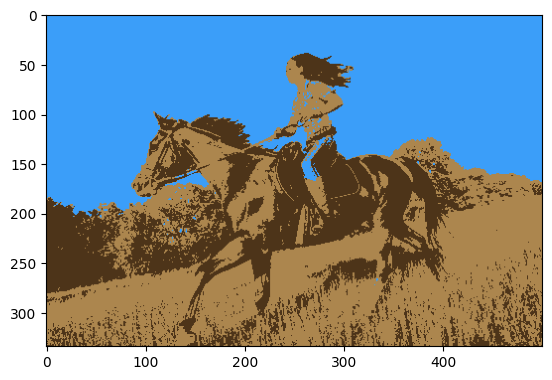

In [ ]:
plt.imshow(slika_boje)

10,8,6,4,2 boje

In [ ]:
segmented_imgs=[]
n_colors=(10,8,6,4,2)
for n_clusters in n_colors:
  kmeans=KMeans(n_clusters=n_clusters,n_init=1,random_state=42).fit(X)
  segmented_img=kmeans.cluster_centers_[kmeans.labels_]
  segmented_img=segmented_img.astype(int)

  segmented_imgs.append(segmented_img.reshape(image.shape))

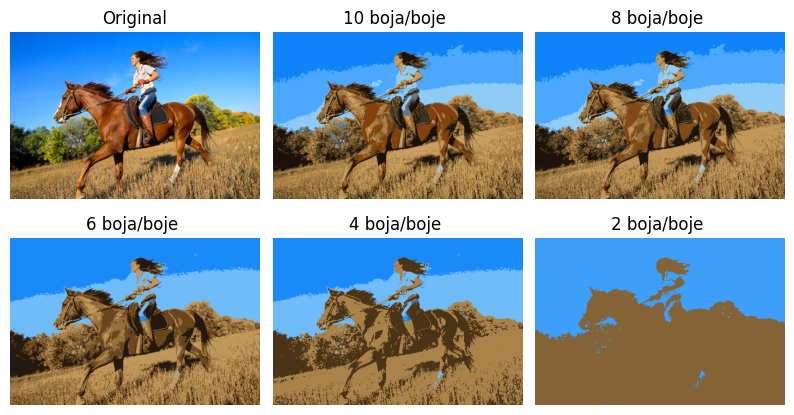

In [ ]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.15)
plt.subplot(2,3,1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

for i,n_clusters in enumerate(n_colors):
  plt.subplot(2,3,2+i)
  plt.imshow(segmented_imgs[i])
  plt.title("{} boja/boje ".format(n_clusters))
  plt.axis('off')
plt.show()

## Hijerarhijsko grupiranje

Objašenjenje hijerarhijskog grupiranja od 11.32 na 
[poveznici](http://www.youtube.com/watch?v=QXOkPvFM6NU&t=11m32s).

Sklearn:

* https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
* https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html


Scipy.org:
* https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html  


###Definiranje podataka

Definiranje 10 točaka u kordinatnom sustavu



In [ ]:
import numpy as np

podaci=np.array([[2,2],[15,4],[2,3], [4,5],[5,5],[20,4],[22,7],[17,7],[20,10],[3,3]])
podaci

array([[ 2,  2],
       [15,  4],
       [ 2,  3],
       [ 4,  5],
       [ 5,  5],
       [20,  4],
       [22,  7],
       [17,  7],
       [20, 10],
       [ 3,  3]])

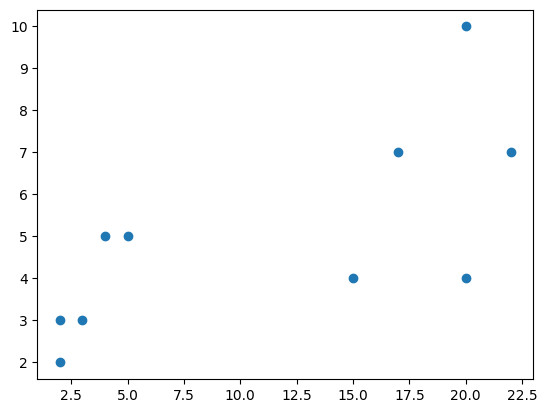

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(podaci[:,0],podaci[:,1])

###Računanje udaljenosti između točaka: 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

Izračunavamo sve moguće udaljenosti između točaka 
* za 10 točaka dobiti ćemo 45 udaljenosti, odnosno sve moguće kombinacije

In [ ]:
from scipy.spatial.distance import pdist
udaljenosti=pdist(podaci)
udaljenosti

###Primjena hijerarhijskog grupiranja



*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage



In [ ]:
from scipy.cluster.hierarchy import linkage
stablo=linkage(udaljenosti)

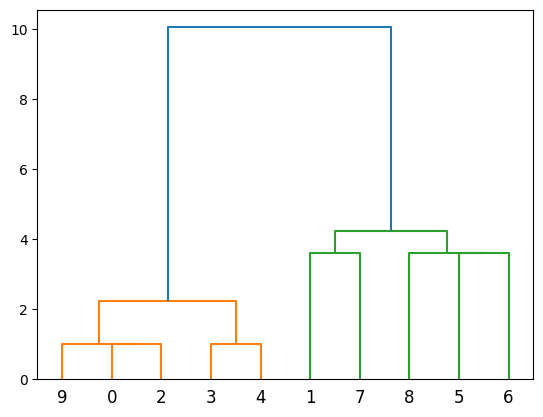

In [ ]:
from scipy.cluster.hierarchy import dendrogram
dendrogram_crtanje=dendrogram(stablo)

####Određivanje grupa/klastera

* po udaljenosti točaka

In [ ]:
from scipy.cluster.hierarchy import fcluster
poudaljenosti=fcluster(stablo,6,criterion='distance')

In [ ]:
poudaljenosti

array([1, 2, 1, 1, 1, 2, 2, 2, 2, 1], dtype=int32)

In [ ]:
poudaljenosti=fcluster(stablo,4,criterion='distance')

In [ ]:
poudaljenosti

array([1, 2, 1, 1, 1, 3, 3, 2, 3, 1], dtype=int32)

In [ ]:
plt.scatter(podaci[:,0], podaci[:,1], c=poudaljenosti, cmap="cool")

* po broju klastera

In [ ]:
pobrojuklastera=fcluster(stablo,3,criterion='maxclust')

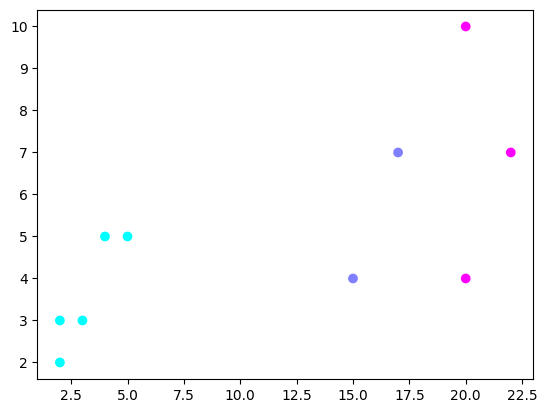

In [ ]:
plt.scatter(podaci[:,0], podaci[:,1], c=pobrojuklastera, cmap="cool")

####Evaluacijske metode (proučiti samostalno)

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.inconsistent.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html#scipy.cluster.hierarchy.cophenet